In [7]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (20,15)

#### **Problem 1** Where is the 5 $\sigma$ threshold limit?

In [63]:
# Creating Background Data
np.random.seed(123)
bckg = stats.poisson.rvs(100,size = 1000000)

#5 Sigma Measurement
prob_5sigma = stats.norm.cdf(5)
measurement = stats.poisson.ppf(prob_5sigma,100)

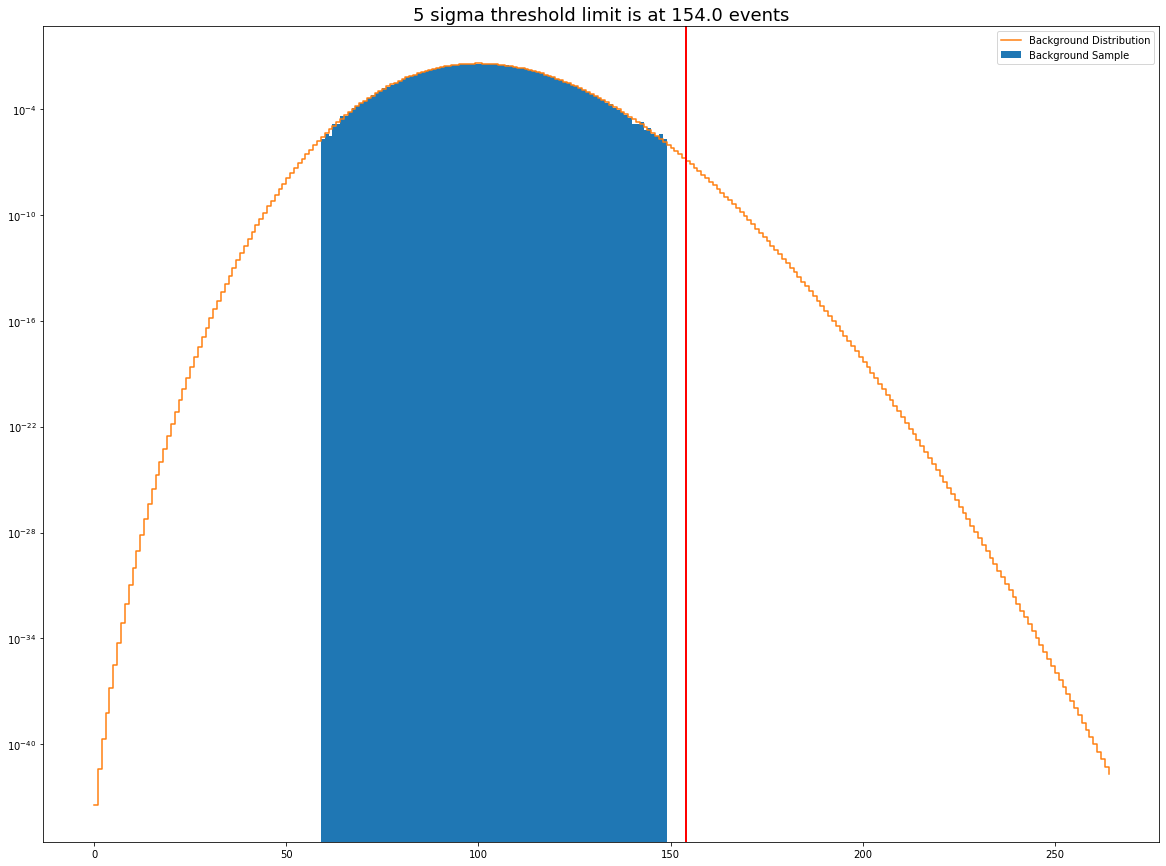

In [177]:
#Plotting Histograms
np.random.seed(123)
x = range(0,265)
plt.hist(bckg,bins = range(50,155),density = True, label = 'Background Sample')
plt.step(x,stats.poisson.pmf(x,100),where = 'post', label = 'Background Distribution')
plt.axvline(measurement,Linewidth = 2,color='red')
plt.yscale('log')
plt.title('5 sigma threshold limit is at ' + str(measurement) + ' events', Fontsize = 18)
plt.legend()
plt.show()

#### **Problem 2** Inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30 $\sigma$ range. Inject this signal into your background data many times.

In [175]:
#Finding the sigma of 250 events
np.random.seed(123)
measurement_prob = stats.poisson.sf(250,100)
sigma = stats.norm.isf(measurement_mean)
print('probability of measuring 250 events is',measurement_prob,'which corresponds to a',sigma,'sigma event')

#Generating 3000 events and injecting into the background
signal = 250 + stats.poisson.rvs(100, size = 3000)
data = np.append(signal,bckg)

probability of measuring 250 events is 7.587806695339081e-37 which corresponds to a 12.626023118889883 sigma event


#### **Problem 3**
#### **a)** Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

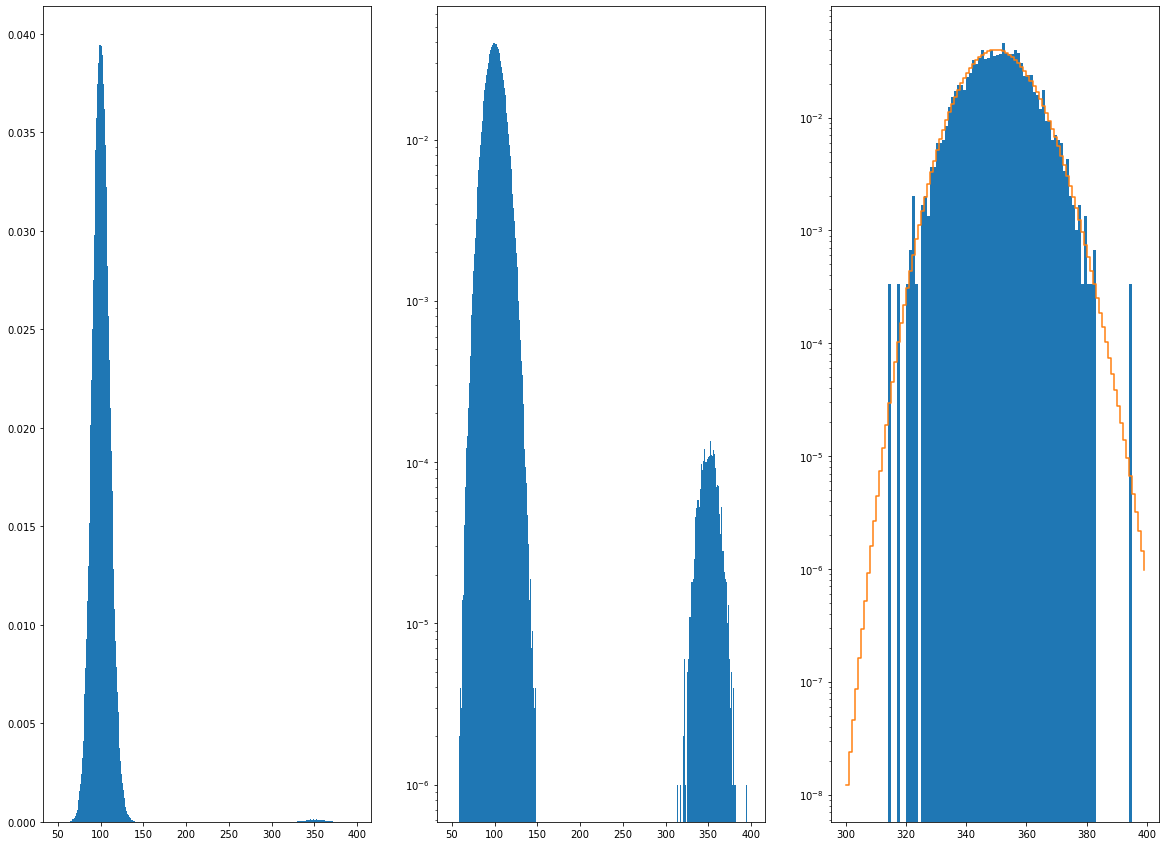

In [176]:
np.random.seed(123)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.hist(data,bins = range(50,400),density = True)
ax2.hist(data,bins = range(50,400),density = True)
ax2.set_yscale('log')
signal_hist = ax3.hist(signal,bins = range(300,400),density = True)
ax3.set_yscale('log')
x2 = range(300,400)
ax3.step(x2,stats.poisson.pmf(x2,100,loc=250),where = 'post')
plt.show()

#### **b)** Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

In [178]:
np.random.seed(123)
print('probability lower =',stats.poisson.cdf(350,100,loc = 250))
print('probability higher =',stats.poisson.sf(350,100,loc = 250))
probs = signal_hist[0]
vals = signal_hist[1][:-1]
print('probability lower =',stats.poisson.cdf(350,100,loc = 250)-stats.poisson.cdf(345,100,loc = 250))
print('probability higher =',stats.poisson.sf(350,100,loc = 250)-stats.poisson.sf(355,100,loc = 250))

probability lower = 0.5265621985299985
probability higher = 0.47343780147000153
probability lower = 0.19537046449469203
probability higher = 0.186245683888543


In [156]:
print('sigma of 527 events:', stats.norm.isf(stats.poisson.sf(527,100)))

sigma of 527 events: 30.00252878811436


In [209]:
np.random.seed(123)
signal2 = stats.randint.rvs(100,527,size = 1000000)
data2 = signal2 + stats.poisson.rvs(100, size = 1000000)
print(np.max(data2),np.min(data2))
print(np.max(signal2),np.min(signal2))

663 163
526 100


#### **a)**

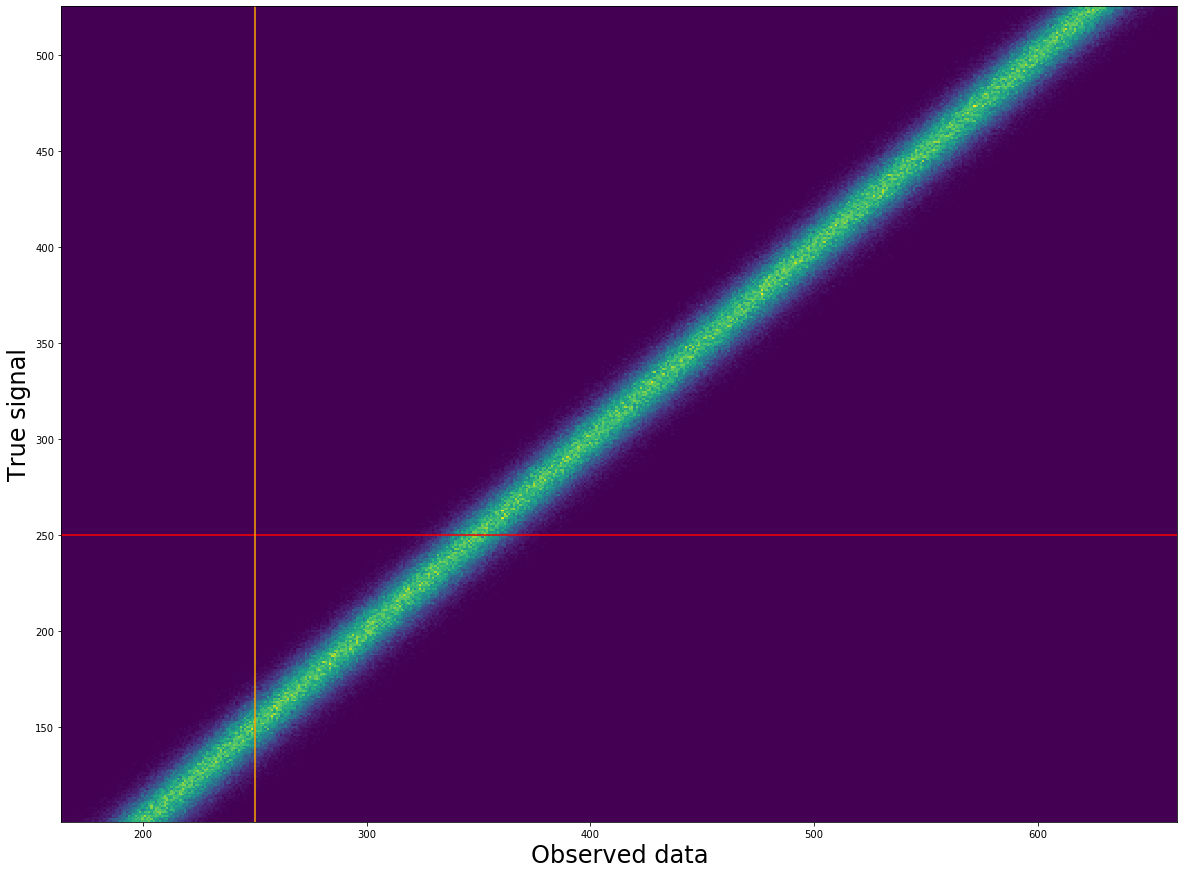

In [278]:
signaledges = np.array(range(100,527))
dataedges = np.array(range(163,664))

Psd, temp, temp2= np.histogram2d(np.array(data2),np.array(signal2), bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal', fontsize = 24)
plt.xlabel('Observed data', fontsize = 24)

plt.axhline(signaledges[150],color = 'red')
plt.axvline(dataedges[87],color = 'orange')

plt.show()


#### **b)**

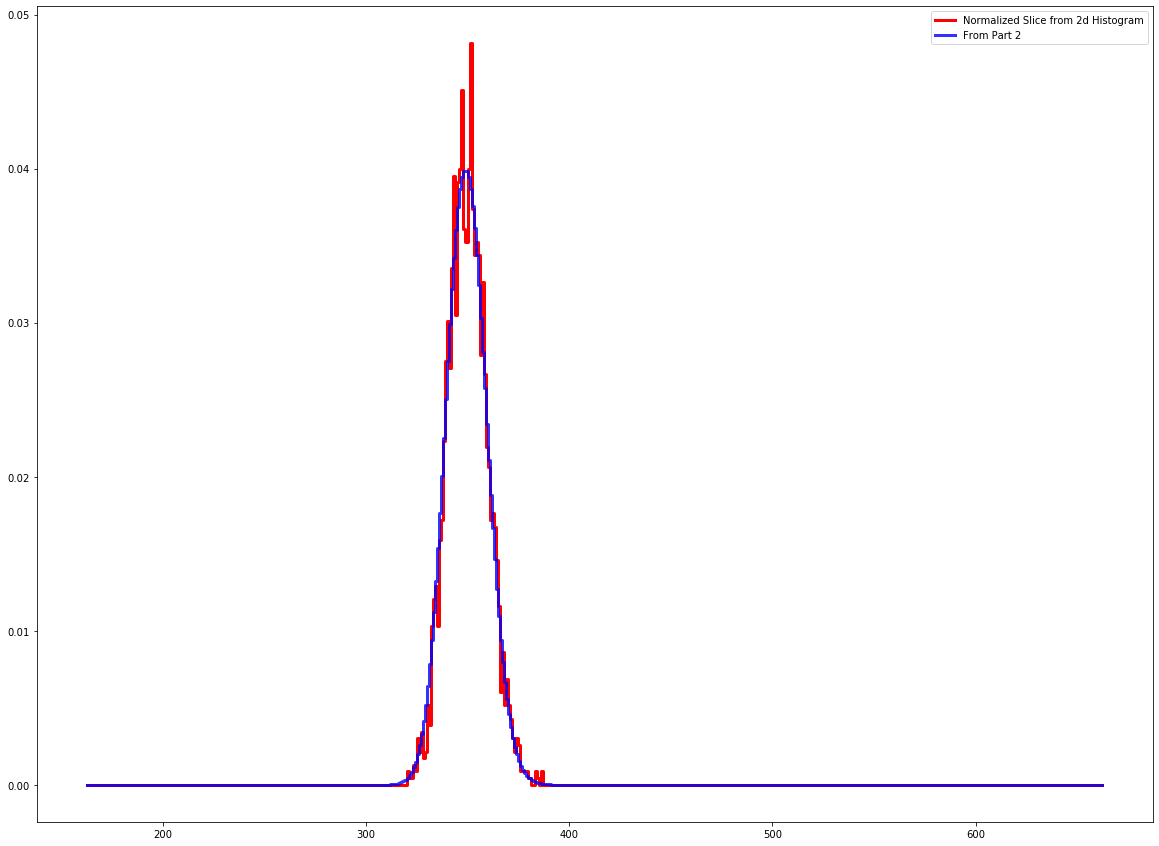

In [241]:
plt.step(temp[:-1],Psd[:,150]/np.sum(Psd[:,150]),Linewidth = 3, color = 'red',label = 'Normalized Slice from 2d Histogram')
plt.step(temp[:-1],stats.poisson.pmf(temp[:-1],100,loc=250),Linewidth = 3,alpha = 0.8,color = 'blue', label = 'From Part 2')
plt.legend()
plt.show()

#### **c)**

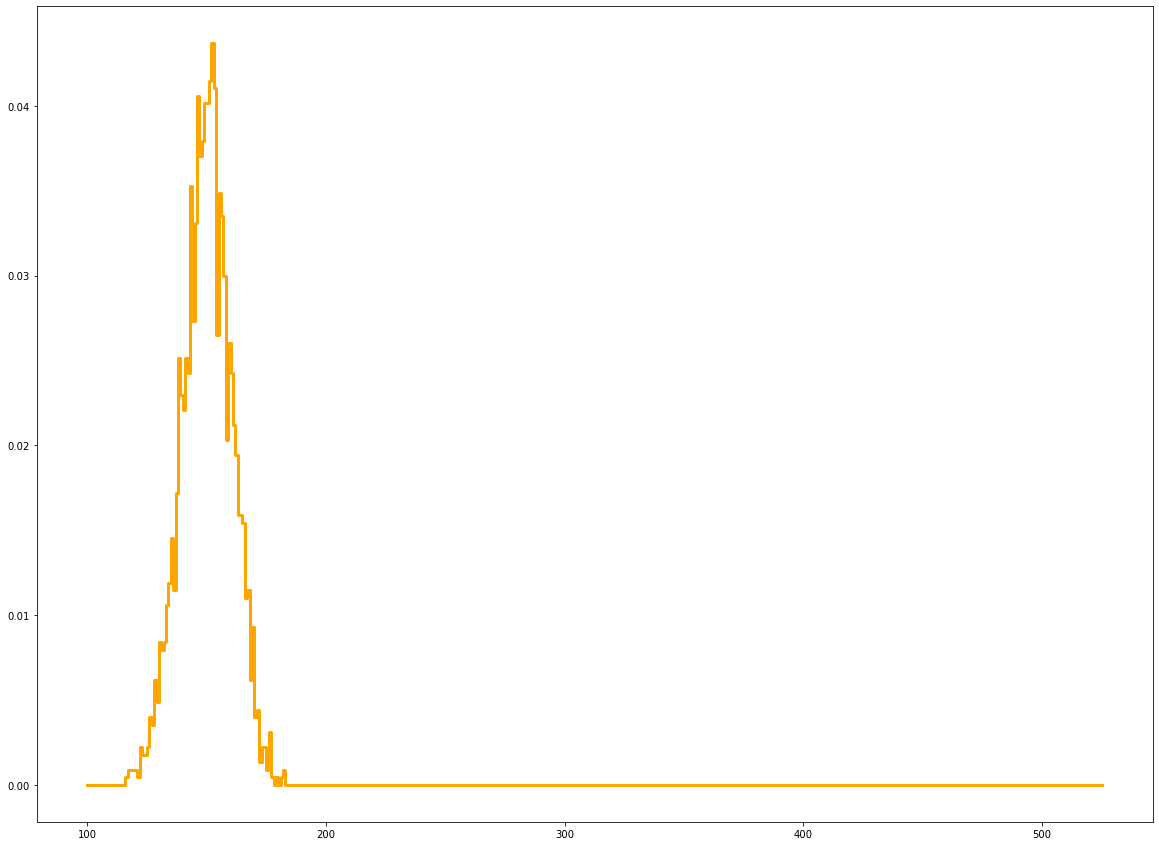

In [279]:
n = 87
plt.step(temp2[:-1],Psd[n,:]/np.sum(Psd[n,:]),Linewidth = 3, color = 'orange')